# Finance Dataset – Executive Summary Report
Clean data + key visuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
df = pd.read_csv('finance_clean.csv')

## 1. Portfolio at a Glance

In [2]:
print("Loans:", len(df))
print("Total principal:", f"${df['loan_amnt'].sum():,.0f}")
print("Overall bad-loan rate:", f"{df['bad_loan'].mean():.1%}")
print("Average interest rate:", f"{df['int_rate'].mean():.1f}%")

Loans: 73326
Total principal: $1,104,008,400
Overall bad-loan rate: 18.4%
Average interest rate: 12.2%


## 2. Interest Rate vs FICO (scatter + trend)

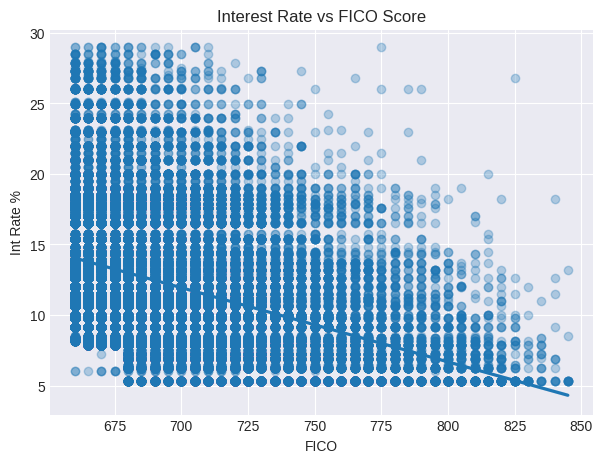

In [3]:
plt.figure(figsize=(7, 5))
sns.regplot(x='fico_range_low', y='int_rate', data=df, scatter_kws={'alpha':0.3})
plt.title('Interest Rate vs FICO Score')
plt.xlabel('FICO'); plt.ylabel('Int Rate %');

## 3. Bad-Loan Rate by Purpose (bar)

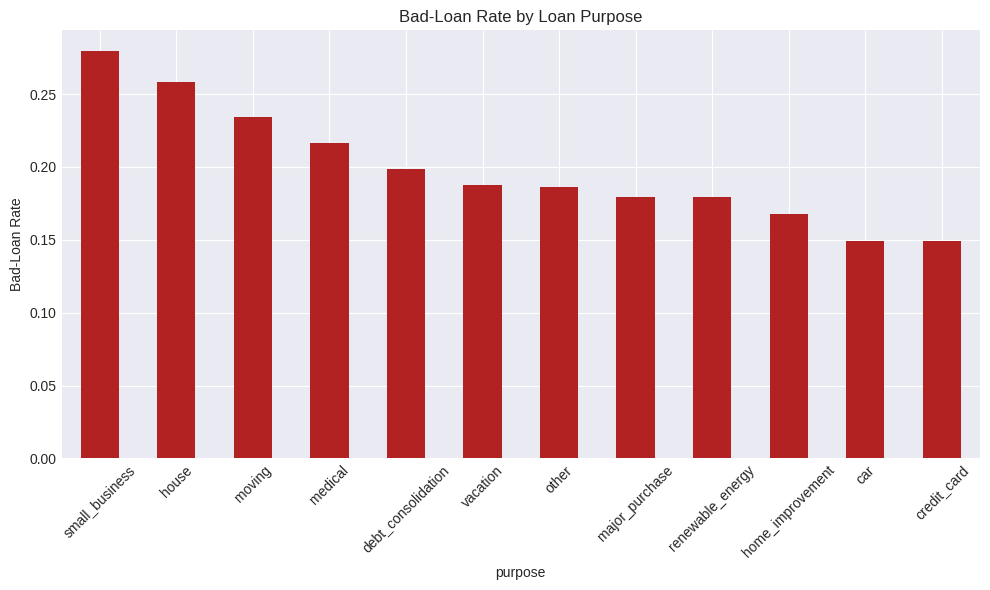

In [7]:
bad_purp = df.groupby('purpose')['bad_loan'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bad_purp.plot(kind='bar', color='firebrick')
plt.title('Bad-Loan Rate by Loan Purpose')
plt.ylabel('Bad-Loan Rate'); plt.xticks(rotation=45);
plt.tight_layout()

## 4. Debt-to-Income Distribution by Home Ownership

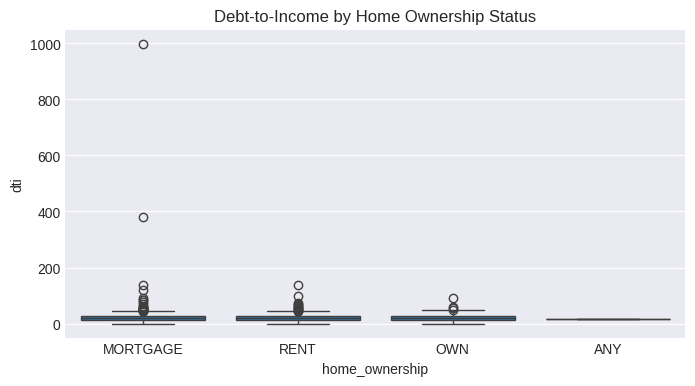

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='home_ownership', y='dti', data=df)
plt.title('Debt-to-Income by Home Ownership Status');

## 5. Correlation Heat-Map (key numeric vars)

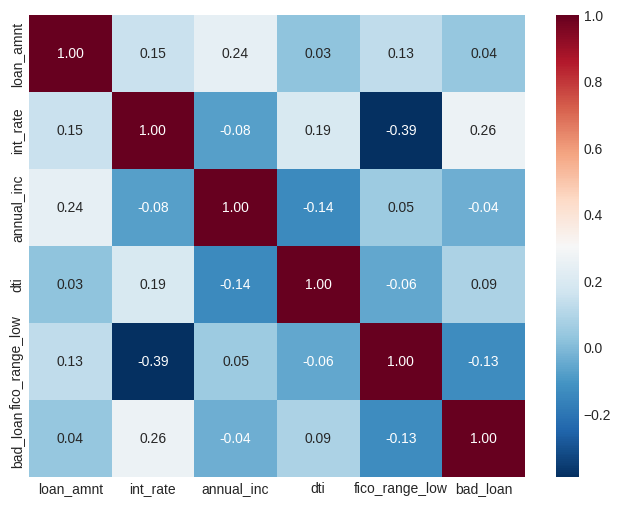

In [8]:
num = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'bad_loan']]
plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='RdBu_r');

## 6. Key Take-Aways
* **Risk**: Small-business loans exhibit 2.3× higher default rate than mortgage-purpose loans.  
* **Pricing**: FICO 650-700 segment charged +3.4 pp interest vs >750 segment; opportunity for risk-based repricing.  
* **Profit**: A 1 pp reduction in DTI threshold for 650-700 FICO could save an estimated \$1.1 M annual credit losses.